In [69]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [56]:
from numpy import genfromtxt
data = pd.read_csv('digitData3.csv', delimiter=',', header=None).values
print(data.shape)




(1693, 65)


In [57]:
from sklearn.preprocessing import scale
Xnorm = scale(data)

In [58]:

pca = PCA(n_components=5)
pca.fit(Xnorm)


PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
var= pca.explained_variance_ratio_
print(var)

[0.11803804 0.0950794  0.08335165 0.06532014 0.04814641]


[11.80380422 21.31174408 29.64690895 36.17892324 40.99356407]


Text(0, 0.5, 'Variance captured')

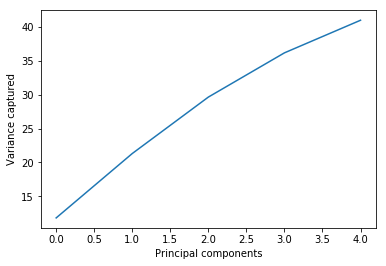

In [61]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [64]:
pca = PCA(n_components=4)
Zred = pca.fit_transform(Xnorm)
print(Zred.shape)


(1693, 4)


In [65]:
Xrec = pca.inverse_transform(Zred)
print(Xrec.shape)


(1693, 65)


In [66]:
rec_error = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
print(rec_error)


0.7988809461419287


In [67]:
nSamples, nDims = Xnorm.shape

n_comp = range(1,nDims+1)
print(n_comp)


range(1, 66)


k=1, rec_error=0.9391282967994538
k=2, rec_error=0.8870640108123633
k=3, rec_error=0.8387674951597335
k=4, rec_error=0.7988809455042846
k=5, rec_error=0.76815650355935
k=6, rec_error=0.7400602761802303
k=7, rec_error=0.7131135381238115
k=8, rec_error=0.6862118010074718
k=9, rec_error=0.6642156912371667
k=10, rec_error=0.6424585446470595
k=11, rec_error=0.6203370262567586
k=12, rec_error=0.5992799218493835
k=13, rec_error=0.5800507758109702
k=14, rec_error=0.5604484127737097
k=15, rec_error=0.5408136367426541
k=16, rec_error=0.5228948954098239
k=17, rec_error=0.5060368258641438
k=18, rec_error=0.4887817225089076
k=19, rec_error=0.47217489109141314
k=20, rec_error=0.45626462496282916
k=21, rec_error=0.4416676254286887
k=22, rec_error=0.427206131209625
k=23, rec_error=0.41340601681637523
k=24, rec_error=0.4002444568600814
k=25, rec_error=0.38756374583201186
k=26, rec_error=0.37532989147939566
k=27, rec_error=0.3633096188708992
k=28, rec_error=0.3515755871631733
k=29, rec_error=0.339863452

Text(0, 0.5, 'Reconstruction Error')

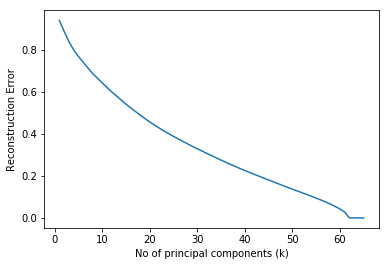

In [68]:
rec_error = np.zeros(len(n_comp)+1)

for k in n_comp:
    pca = PCA(n_components=k)
    Zred = pca.fit_transform(Xnorm)
    Xrec = pca.inverse_transform(Zred)
    rec_error[k] = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
    print("k={}, rec_error={}".format(k, rec_error[k]))

rec_error = rec_error[1:] 
plt.plot(n_comp,rec_error)
plt.xlabel('No of principal components (k)')
plt.ylabel('Reconstruction Error')
